# Sales Forecast by Prophet (E-Commerce Sales)

created by : Hanindhiya Ika Septiana

**Contents**

- Data Understanding
- Data Pre Processing 
- Forecast Design by Facebook Prophet
  - Stock Prediction
  - Nominal/Monetary Predicition

In [121]:
!pip install pystan fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
import numpy as np 
import pandas as pd

import time, warnings
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

## Data Understanding 

In [123]:
df = pd.read_csv('/content/drive/MyDrive/PORTFOLIO DATA/dataset/ecommerce_transaction.csv')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [124]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [125]:
df.shape

(541909, 8)

## Data Pre Processing

In [126]:
retail = df[(df['Country'] == 'United Kingdom') & (df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8.0,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24.0,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [127]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128436
Country             0
dtype: int64

In [128]:
retail.dropna(subset=['CustomerID'],how='all',inplace=True)
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [129]:
retail.shape

(351007, 8)

In [130]:
retail.drop_duplicates(inplace=True)
retail.duplicated().sum()

0

In [131]:
retail.shape

(345933, 8)

In [132]:
retail['Date'] = pd.DatetimeIndex(retail['InvoiceDate']).date

In [133]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12.0,12/9/2011 12:31,1.95,15804.0,United Kingdom,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8.0,12/9/2011 12:49,2.95,13113.0,United Kingdom,2011-12-09
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24.0,12/9/2011 12:49,1.25,13113.0,United Kingdom,2011-12-09
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24.0,12/9/2011 12:49,8.95,13113.0,United Kingdom,2011-12-09


In [134]:
# converting from float to int
retail['Quantity'] = retail['Quantity'].apply(np.int64)
retail['CustomerID'] = retail['CustomerID'].apply(np.int64)
  
# displaying the datatypes
display(retail.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Date            object
dtype: object

In [135]:
retail['Total'] = retail['Quantity'] * retail['UnitPrice']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804,United Kingdom,2011-12-09,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113,United Kingdom,2011-12-09,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113,United Kingdom,2011-12-09,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113,United Kingdom,2011-12-09,214.80


In [136]:
retail['Date'] =  pd.to_datetime(retail['Date'])                 

In [137]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID              int64
Country                object
Date           datetime64[ns]
Total                 float64
dtype: object

## Pivot Table & Data Analysis 

In [138]:
retail.pivot_table(values='Quantity', index = 'Date', \
                    columns= 'Description', aggfunc= ['sum'], fill_value=0, margins=True, margins_name='Grand Total')

sum  \
Description          4 PURPLE FLOCK DINNER CANDLES   
Date                                                 
2010-12-01 00:00:00                              2   
2010-12-02 00:00:00                              0   
2010-12-03 00:00:00                              0   
2010-12-05 00:00:00                             12   
2010-12-06 00:00:00                              0   
...                                            ...   
2011-12-06 00:00:00                              1   
2011-12-07 00:00:00                             24   
2011-12-08 00:00:00                             12   
2011-12-09 00:00:00                              0   
Grand Total                                    132   

                                                                       \
Description          50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
Date                                                                    
2010-12-01 00:00:00                              0                  0   
2010-12-02 00:00:00                              0                  0   
2010-12-03 00:00:00                              0                  0   
2010-12-05 00:00:00                              0                  0   
2010-12-06 00:00:00                              0                  0   
...                                            ...                ...   
2011-12-06 00:00:00                              0                  4   
2011-12-07 00:00:00                              4                  0   
2011-12-08 00:00:00                              0                 13   
2011-12-09 00:00:00                             12                  0   
Grand Total                                   1697                657   

                                                                           \
Description          I LOVE LONDON MINI BACKPACK  NINE DRAWER OFFICE TIDY   
Date                                                                        
2010-12-01 00:00:00                            0                        0   
2010-12-02 00:00:00                            0                        0   
2010-12-03 00:00:00                            0                        0   
2010-12-05 00:00:00                            0                        0   
2010-12-06 00:00:00                            0                        0   
...                                          ...                      ...   
2011-12-06 00:00:00                            0                        0   
2011-12-07 00:00:00                            4                        1   
2011-12-08 00:00:00                            4                        0   
2011-12-09 00:00:00                            0                        0   
Grand Total                                  180                       43   

                                                                          \
Description          OVAL WALL MIRROR DIAMANTE   RED SPOT GIFT BAG LARGE   
Date                                                                       
2010-12-01 00:00:00                           0                        0   
2010-12-02 00:00:00                           0                        0   
2010-12-03 00:00:00                           0                        0   
2010-12-05 00:00:00                           0                        0   
2010-12-06 00:00:00                           0                        0   
...                                         ...                      ...   
2011-12-06 00:00:00                           0                        6   
2011-12-07 00:00:00                           0                        0   
2011-12-08 00:00:00                           1                       26   
2011-12-09 00:00:00                           0                       12   
Grand Total                                 111                     1542   

                                                                              \
Description          SET 2 TEA TOWELS I LOV

In [139]:
retail.pivot_table(index=['Date'],values=['Quantity'],
                   aggfunc='sum').sort_values(by=['Quantity'],ascending=False).head(10)

,Quantity
Date,
2011-01-18,78603
2011-09-20,41033
2011-12-05,35851
2011-11-09,35555
2011-08-04,35361
2011-10-05,32034
2011-11-03,31192
2011-11-04,30856
2010-12-02,30306


In [140]:
retail.pivot_table(values='Total', index = 'Date', \
                    columns= 'Description', aggfunc= ['sum'], fill_value=0, margins=True, margins_name='Grand Total')

sum  \
Description          4 PURPLE FLOCK DINNER CANDLES   
Date                                                 
2010-12-01 00:00:00                           5.10   
2010-12-02 00:00:00                           0.00   
2010-12-03 00:00:00                           0.00   
2010-12-05 00:00:00                          30.60   
2010-12-06 00:00:00                           0.00   
...                                            ...   
2011-12-06 00:00:00                           0.79   
2011-12-07 00:00:00                          18.96   
2011-12-08 00:00:00                           9.48   
2011-12-09 00:00:00                           0.00   
Grand Total                                 250.36   

                                                                       \
Description          50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
Date                                                                    
2010-12-01 00:00:00                           0.00               0.00   
2010-12-02 00:00:00                           0.00               0.00   
2010-12-03 00:00:00                           0.00               0.00   
2010-12-05 00:00:00                           0.00               0.00   
2010-12-06 00:00:00                           0.00               0.00   
...                                            ...                ...   
2011-12-06 00:00:00                           0.00               5.00   
2011-12-07 00:00:00                           5.00               0.00   
2011-12-08 00:00:00                           0.00              16.25   
2011-12-09 00:00:00                          15.00               0.00   
Grand Total                                2037.25             821.25   

                                                                           \
Description          I LOVE LONDON MINI BACKPACK  NINE DRAWER OFFICE TIDY   
Date                                                                        
2010-12-01 00:00:00                          0.0                     0.00   
2010-12-02 00:00:00                          0.0                     0.00   
2010-12-03 00:00:00                          0.0                     0.00   
2010-12-05 00:00:00                          0.0                     0.00   
2010-12-06 00:00:00                          0.0                     0.00   
...                                          ...                      ...   
2011-12-06 00:00:00                          0.0                     0.00   
2011-12-07 00:00:00                         16.6                    14.95   
2011-12-08 00:00:00                         16.6                     0.00   
2011-12-09 00:00:00                          0.0                     0.00   
Grand Total                                747.0                   613.45   

                                                                          \
Description          OVAL WALL MIRROR DIAMANTE   RED SPOT GIFT BAG LARGE   
Date                                                                       
2010-12-01 00:00:00                        0.00                      0.0   
2010-12-02 00:00:00                        0.00                      0.0   
2010-12-03 00:00:00                        0.00                      0.0   
2010-12-05 00:00:00                        0.00                      0.0   
2010-12-06 00:00:00                        0.00                      0.0   
...                                         ...                      ...   
2011-12-06 00:00:00                        0.00                      7.5   
2011-12-07 00:00:00                        0.00                      0.0   
2011-12-08 00:00:00                        9.95                     32.5   
2011-12-09 00:00:00                        0.00                     15.0   
Grand Total                              960.45                   1843.5   

                                                                              \
Description          SET 2 TEA TOWELS I LOV

In [141]:
retail['Time'] = pd.DatetimeIndex(retail['InvoiceDate']).time

In [142]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01,15.30,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,20.34,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01,22.00,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,20.34,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,20.34,08:26:00


In [143]:
retail.pivot_table(index=['Time'],values=['Quantity'],
                   aggfunc='sum').sort_values(by=['Quantity'],ascending=False).head(10)

,Quantity
Time,
10:01:00,79027
11:53:00,21197
13:20:00,20002
10:38:00,18824
11:05:00,18003
12:14:00,17933
12:11:00,17242
10:20:00,17052
10:52:00,16591


In [144]:
retail.pivot_table(index=['Time'],values=['Total'],
                   aggfunc='sum').sort_values(by=['Total'],ascending=False).head(10)

,Total
Time,
10:01:00,84087.00
15:28:00,48477.96
11:05:00,41443.41
12:08:00,40657.96
13:20:00,39643.69
10:12:00,37363.79
10:38:00,35195.64
10:20:00,34458.13
11:53:00,33470.74


In [145]:
#retail.loc[(retail["Date"]== "2010-12-01") & (retail["CustomerID"]== 17850)].reset_index()

## Forecasting by Prophet 

### Stock Prediction

In [198]:
f_stock = retail.groupby(['Date']).agg(Quantity=('Quantity','sum')).reset_index()
f_stock.head()

,Date,Quantity
0,2010-12-01,20822
1,2010-12-02,30306
2,2010-12-03,7565
3,2010-12-05,13304
4,2010-12-06,15219


In [147]:
# Rename the features
f_stock.columns = ['ds', 'y']

f_stock

,ds,y
0,2010-12-01,20822
1,2010-12-02,30306
2,2010-12-03,7565
3,2010-12-05,13304
4,2010-12-06,15219
...,...,...
300,2011-12-05,35851
301,2011-12-06,25484
302,2011-12-07,28815
303,2011-12-08,25025


In [148]:
# Creating the Prophet Object (model)
m_stock = Prophet(interval_width=0.95, daily_seasonality=True)

# Train Model
model = m_stock.fit(f_stock)

# Forecast Away
future_stock = m_stock.make_future_dataframe(periods=360,freq='D')
forecast_stock = m_stock.predict(future_stock)

forecast_stock.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,19017.469817,716.255026,25144.323856,19017.469817,19017.469817,-6106.199664,-6106.199664,-6106.199664,-7160.38676,-7160.38676,-7160.38676,1054.187095,1054.187095,1054.187095,0.0,0.0,0.0,12911.270153
1,2010-12-02,18999.898008,3515.404760,27561.167703,18999.898008,18999.898008,-3584.094606,-3584.094606,-3584.094606,-7160.38676,-7160.38676,-7160.38676,3576.292154,3576.292154,3576.292154,0.0,0.0,0.0,15415.803402
2,2010-12-03,18982.326200,-2352.057782,21811.479162,18982.326200,18982.326200,-9334.947085,-9334.947085,-9334.947085,-7160.38676,-7160.38676,-7160.38676,-2174.560326,-2174.560326,-2174.560326,0.0,0.0,0.0,9647.379114
3,2010-12-05,18947.182583,-4964.962892,18398.390202,18947.182583,18947.182583,-12682.934840,-12682.934840,-12682.934840,-7160.38676,-7160.38676,-7160.38676,-5522.548080,-5522.548080,-5522.548080,0.0,0.0,0.0,6264.247743
4,2010-12-06,18929.610774,-1126.580938,24065.402355,18929.610774,18929.610774,-7540.587951,-7540.587951,-7540.587951,-7160.38676,-7160.38676,-7160.38676,-380.201192,-380.201192,-380.201192,0.0,0.0,0.0,11389.022823


In [149]:
forecast_stock[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
660,2012-11-29,49894.202937,33187.205151,65304.821894
661,2012-11-30,44211.707152,29351.869804,59895.851086
662,2012-12-01,47349.672519,32696.659884,61727.488776
663,2012-12-02,41000.432787,25574.085048,55546.413000
664,2012-12-03,46211.136371,30463.960367,61448.025315


In [150]:
plot_plotly(m_stock, forecast_stock)

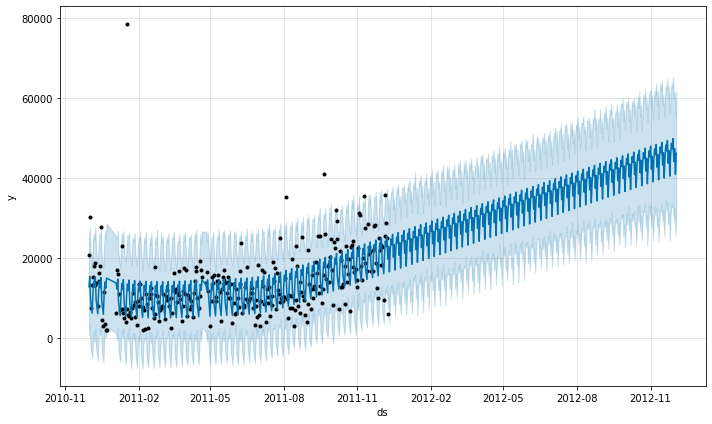

In [151]:
plot_1 = m_stock.plot(forecast_stock)

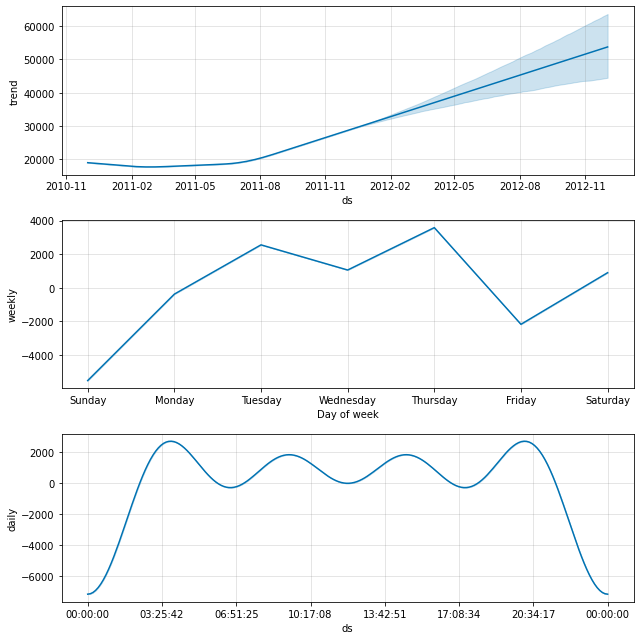

In [152]:
plot_2 = m_stock.plot_components(forecast_stock)

In [179]:
join_stock = pd.merge(forecast_stock, f_stock, on ='ds', how ='left')
join_stock[['ds','y','yhat','yhat_lower','yhat_upper']].head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2010-12-01,20822.0,12911.270153,716.255026,25144.323856
1,2010-12-02,30306.0,15415.803402,3515.404760,27561.167703
2,2010-12-03,7565.0,9647.379114,-2352.057782,21811.479162
3,2010-12-05,13304.0,6264.247743,-4964.962892,18398.390202
4,2010-12-06,15219.0,11389.022823,-1126.580938,24065.402355


In [195]:
join_stock[join_stock.ds <= '2011-12-09' ][['ds','y','yhat']]

,ds,y,yhat
0,2010-12-01,20822.0,12911.270153
1,2010-12-02,30306.0,15415.803402
2,2010-12-03,7565.0,9647.379114
3,2010-12-05,13304.0,6264.247743
4,2010-12-06,15219.0,11389.022823
...,...,...,...
300,2011-12-05,35851.0,21329.299454
301,2011-12-06,25484.0,24329.639344
302,2011-12-07,28815.0,22900.401131
303,2011-12-08,25025.0,25490.862884


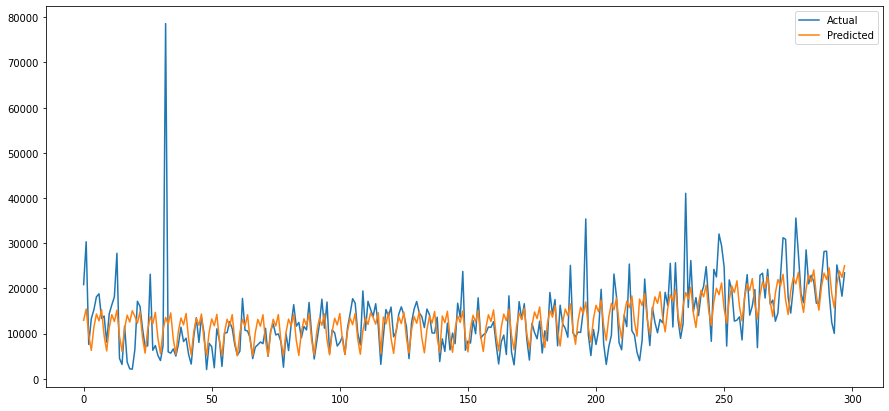

In [200]:
# Plot Actual vs Predicted
y_true = join_stock[join_stock.ds <= '2011-12-01']['y']
y_pred = join_stock[join_stock.ds <= '2011-12-01']['yhat']

pyplot.figure(figsize=(15,7))
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

### Nominal Prediction

In [155]:
f_nominal = retail.groupby(['Date']).agg(Quantity=('Total','sum')).reset_index()
f_nominal

,Date,Quantity
0,2010-12-01,41411.69
1,2010-12-02,46550.62
2,2010-12-03,18688.37
3,2010-12-05,25060.77
4,2010-12-06,29287.16
...,...,...
300,2011-12-05,54330.31
301,2011-12-06,41134.95
302,2011-12-07,48929.23
303,2011-12-08,46801.24


In [156]:
# Rename the features
f_nominal.columns = ['ds', 'y']

f_nominal

,ds,y
0,2010-12-01,41411.69
1,2010-12-02,46550.62
2,2010-12-03,18688.37
3,2010-12-05,25060.77
4,2010-12-06,29287.16
...,...,...
300,2011-12-05,54330.31
301,2011-12-06,41134.95
302,2011-12-07,48929.23
303,2011-12-08,46801.24


In [157]:
# Creating the Prophet Object (model)
m_nominal = Prophet(interval_width=0.95, daily_seasonality=True)

# Train Model
model = m_nominal.fit(f_nominal)

# Forecast Away
future_nominal = m_nominal.make_future_dataframe(periods=360,freq='D')
forecast_nominal = m_nominal.predict(future_nominal)

forecast_nominal.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,37284.743089,345.120497,41461.457165,37284.743089,37284.743089,-15783.065629,-15783.065629,-15783.065629,-16368.231321,-16368.231321,-16368.231321,585.165691,585.165691,585.165691,0.0,0.0,0.0,21501.677460
1,2010-12-02,37243.955683,6607.050626,48111.013404,37243.955683,37243.955683,-10430.744984,-10430.744984,-10430.744984,-16368.231321,-16368.231321,-16368.231321,5937.486337,5937.486337,5937.486337,0.0,0.0,0.0,26813.210699
2,2010-12-03,37203.168277,-3825.130932,38042.224153,37203.168277,37203.168277,-19212.949699,-19212.949699,-19212.949699,-16368.231321,-16368.231321,-16368.231321,-2844.718378,-2844.718378,-2844.718378,0.0,0.0,0.0,17990.218578
3,2010-12-05,37121.593466,-9887.551067,31728.867704,37121.593466,37121.593466,-26092.440304,-26092.440304,-26092.440304,-16368.231321,-16368.231321,-16368.231321,-9724.208983,-9724.208983,-9724.208983,0.0,0.0,0.0,11029.153162
4,2010-12-06,37080.806060,239.303609,43418.284243,37080.806060,37080.806060,-16122.980471,-16122.980471,-16122.980471,-16368.231321,-16368.231321,-16368.231321,245.250850,245.250850,245.250850,0.0,0.0,0.0,20957.825589


In [158]:
plot_plotly(m_nominal, forecast_nominal)

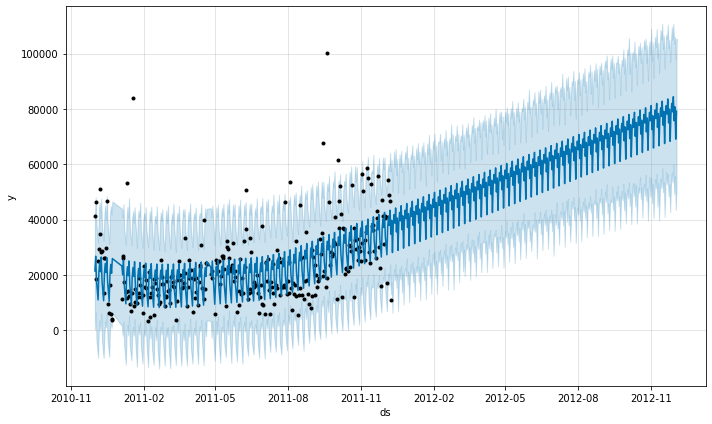

In [159]:
plot_1 = m_nominal.plot(forecast_nominal)

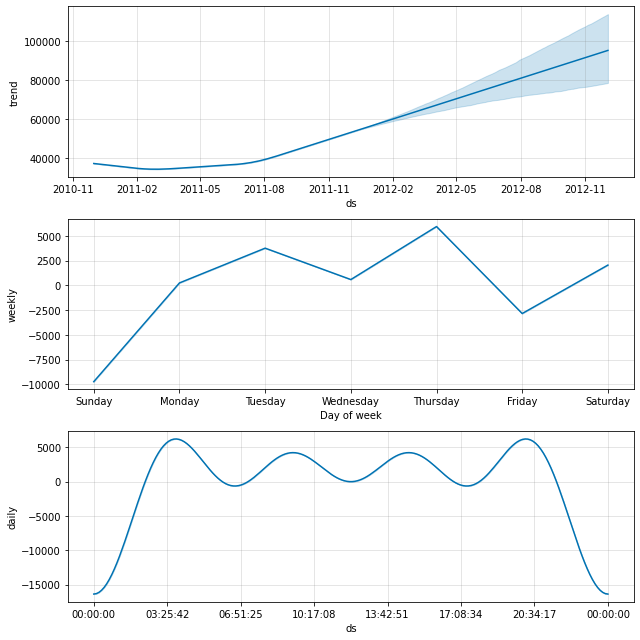

In [160]:
plot_2 = m_nominal.plot_components(forecast_nominal)

In [161]:
join_nominal = pd.merge(forecast_nominal, f_nominal, on ='ds', how ='left')
join_nominal[['ds','y','yhat','yhat_lower','yhat_upper']]

,ds,y,yhat,yhat_lower,yhat_upper
0,2010-12-01,41411.69,21501.677460,345.120497,41461.457165
1,2010-12-02,46550.62,26813.210699,6607.050626,48111.013404
2,2010-12-03,18688.37,17990.218578,-3825.130932,38042.224153
3,2010-12-05,25060.77,11029.153162,-9887.551067,31728.867704
4,2010-12-06,29287.16,20957.825589,239.303609,43418.284243
...,...,...,...,...,...
660,2012-11-29,NaN,84410.808475,60072.801182,110801.787635
661,2012-11-30,NaN,75743.373324,49326.004600,103563.959715
662,2012-12-01,NaN,80748.890184,55766.795904,105988.266983
663,2012-12-02,NaN,69093.421850,43491.233578,97877.907941


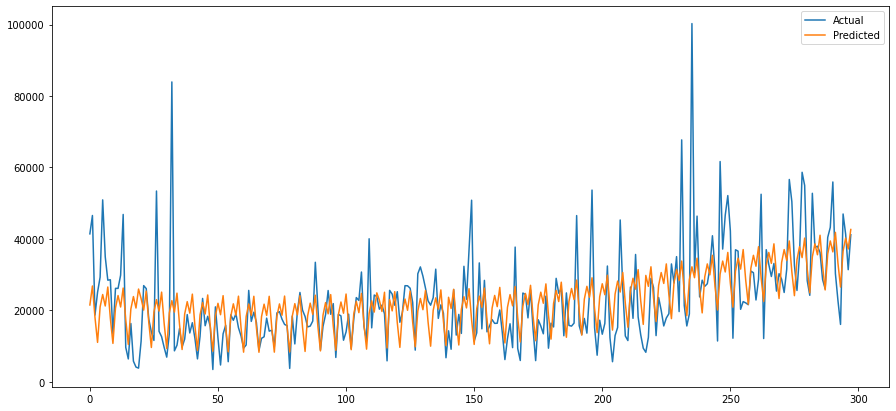

In [202]:
# Plot Actual vs Predicted
y_true = join_nominal[join_nominal.ds <= '2011-12-01']['y']
y_pred = join_nominal[join_nominal.ds <= '2011-12-01']['yhat']

pyplot.figure(figsize=(15,7))
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()